
## Harish Venkatesh 

Data set Reference : https://archive.ics.uci.edu/ml/datasets/Air+Quality

Attribute Information:

0 Date (DD/MM/YYYY)

1 Time (HH.MM.SS)

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7 True hourly averaged NOx concentration in ppb (reference analyzer)

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12 Temperature in Â°C

13 Relative Humidity (%)

14 AH Absolute Humidity


# Aim: 
We will be predicting AH - "Absolute Humidity"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [84]:
df = pd.read_csv("AirQualityUCI_train.csv", na_values = "-200")
df.head(20)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,3/10/2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,3/11/2004,0:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,3/11/2004,1:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,3/11/2004,2:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,3/11/2004,3:00:00,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


In [85]:
df = df.drop('Unnamed: 15',axis=1)
df = df.drop('Unnamed: 16',axis=1)


df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [86]:
df.Date = list(map(lambda x:str(x).split('/')[-1] if (x)!=0 else np.nan,df.Date))
df.Time = list(map(lambda x:str(x).split(':')[0] if (x)!=0 else np.nan,df.Time))

In [87]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [88]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [89]:
df.info() # summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
Date             9471 non-null object
Time             9471 non-null object
CO(GT)           7674 non-null float64
PT08.S1(CO)      8991 non-null float64
NMHC(GT)         914 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [90]:
# converting date and time to float

df["Date"] = df.Date.astype(float)
df["Time"] = df.Time.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
Date             9357 non-null float64
Time             9357 non-null float64
CO(GT)           7674 non-null float64
PT08.S1(CO)      8991 non-null float64
NMHC(GT)         914 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: float64(15)
memory usage: 1.1 MB


In [91]:
df.describe() #statistical summary

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2004.240141,11.498557,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,0.427192,6.923182,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,2004.000000,0.000000,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,2004.000000,5.000000,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,2004.000000,11.000000,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2004.000000,18.000000,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,2005.000000,23.000000,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [92]:
df.isnull().sum()

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64

FILL MISSING VALUES

In [93]:
df.median()


Date             2004.0000
Time               11.0000
CO(GT)              1.8000
PT08.S1(CO)      1063.0000
NMHC(GT)          150.0000
C6H6(GT)            8.2000
PT08.S2(NMHC)     909.0000
NOx(GT)           180.0000
PT08.S3(NOx)      806.0000
NO2(GT)           109.0000
PT08.S4(NO2)     1463.0000
PT08.S5(O3)       963.0000
T                  17.8000
RH                 49.6000
AH                  0.9954
dtype: float64

In [94]:
"""
filling NaN values with mean values - Imputing
Imputing can be done by replacing null values with mean, median, mode values or any a values
from a randomly selected record or a value estimated from any other predicted model
After finalizing the model, the same imputing should be done to new dataset coming in the future before prediction.

You can also group the indexes and use the following methods
method : {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
"""


df.fillna(df.median(), inplace = True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004.0,18.0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004.0,19.0,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004.0,20.0,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004.0,21.0,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004.0,22.0,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [95]:
df.isnull().sum()

# Gives total number of missing values

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

SPLITTING THE DATASET INTO X AND Y

In [96]:
# splitting the dataset for x values (Attributes)

x = df.iloc[:,0:14]
x.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2004.0,18.0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9
1,2004.0,19.0,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7
2,2004.0,20.0,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0
3,2004.0,21.0,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0
4,2004.0,22.0,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6


In [97]:
# splitting the dataset for Y values (Target)

y = df["AH"]
y.head()

0    0.7578
1    0.7255
2    0.7502
3    0.7867
4    0.7888
Name: AH, dtype: float64

EXPLORATORY DATA ANALYSIS (EDA)

In [98]:
"""
After getting a clean dataset, you need to do exploratory data analysis (EDA)
visualize the dataset using scatter matrix or pairplots and see distribution of a single variable
or relationship between the variables
"""

'\nAfter getting a clean dataset, you need to do exploratory data analysis (EDA)\nvisualize the dataset using scatter matrix or pairplots and see distribution of a single variable\nor relationship between the variables\n'

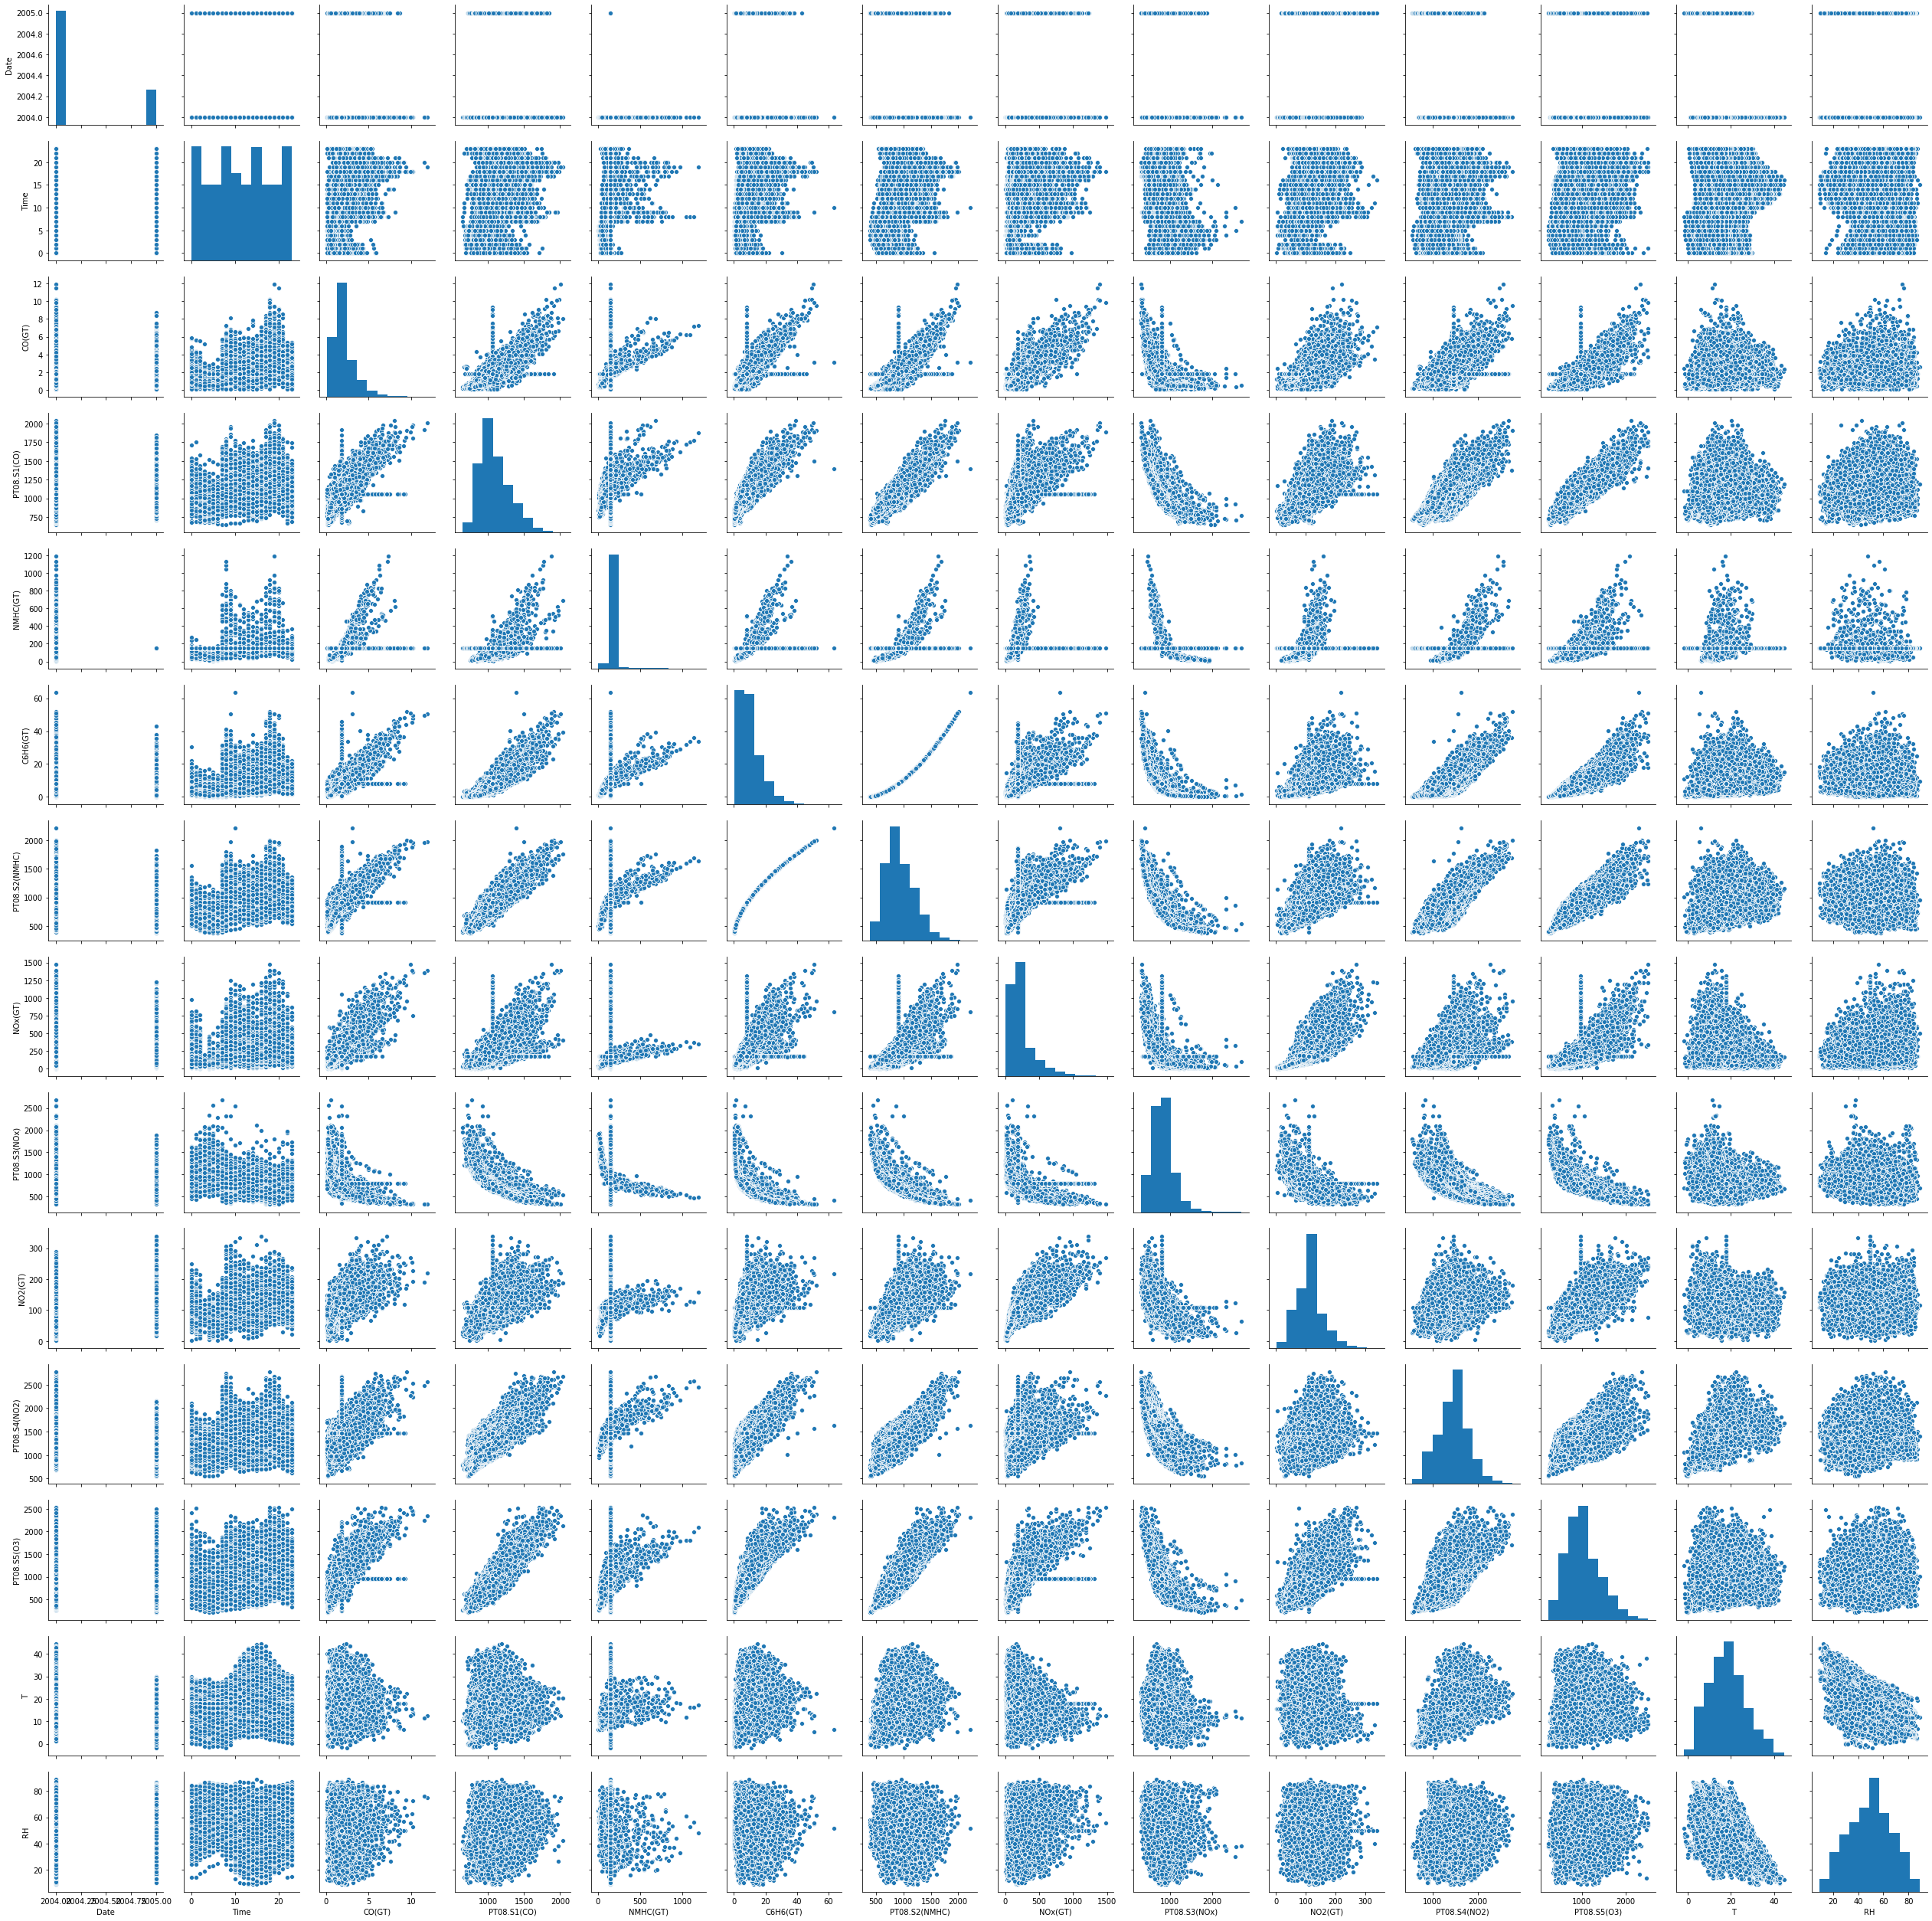

In [99]:
import seaborn as sns

sns.pairplot(x)

In [100]:
x.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2004.0,18.0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9
1,2004.0,19.0,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7
2,2004.0,20.0,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0
3,2004.0,21.0,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0
4,2004.0,22.0,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6


SLITTING INTO TRAIN AND TEST DATA

In [101]:
from sklearn.model_selection import train_test_split

x_train_org, x_test_org, y_train,y_test = train_test_split(x, y, random_state = 0)

# default split is train:75%, test: 25%

In [102]:
x_train_org.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
5237,2004.0,23.0,1.8,966.0,150.0,4.8,756.0,180.0,908.0,109.0,1363.0,741.0,15.9,78.1
3518,2004.0,8.0,1.8,1381.0,150.0,26.0,1454.0,180.0,455.0,109.0,2404.0,1607.0,28.3,47.6
4884,2004.0,6.0,1.8,1051.0,150.0,8.1,901.0,180.0,778.0,109.0,1379.0,1020.0,17.6,57.6
2262,2004.0,0.0,2.0,1086.0,150.0,9.2,946.0,126.0,847.0,89.0,1729.0,945.0,25.2,45.2
3359,2004.0,17.0,1.8,1070.0,150.0,17.3,1218.0,182.0,704.0,166.0,1697.0,1108.0,34.4,16.4


FEATURE SCALING

In [104]:
#Need to normalize or standardize the variables

"""
Scaling just changes the range of your data. 
Normalization is a more radical transformation. 
The point of normalization is to change your observations so that they can be described as a normal distribution.
Since there are outliers in my dataset I am using MinMaxScaler and its not using normal distribution.
"""

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

In [105]:
x_train

array([[0.        , 1.        , 0.1440678 , ..., 0.22589053, 0.38478747,
        0.86666667],
       [0.        , 0.34782609, 0.1440678 , ..., 0.60208514, 0.66219239,
        0.48301887],
       [0.        , 0.26086957, 0.1440678 , ..., 0.34708949, 0.42281879,
        0.60880503],
       ...,
       [0.        , 0.2173913 , 0.02542373, ..., 0.18635969, 0.41163311,
        0.54465409],
       [0.        , 0.7826087 , 0.10169492, ..., 0.19070374, 0.75167785,
        0.30440252],
       [0.        , 0.60869565, 0.13559322, ..., 0.26846221, 0.89709172,
        0.14465409]])

K NEIGHBORS REGRESSOR

In [106]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score


knn_reg = KNeighborsRegressor()

knn_reg_scores = cross_val_score(knn_reg, x_train, y_train)
print("Cross-validation scores: {}".format(knn_reg_scores))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Cross-validation scores: [0.93951746 0.93727683 0.93277077]


In [107]:
print("Average cross-validation score: {:.2f}".format(knn_reg_scores.mean()))

Average cross-validation score: 0.94


In [108]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsRegressor()

param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors

knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [109]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 4}

In [110]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9442369600834333

In [111]:
 
knn = KNeighborsRegressor(n_neighbors = 4)

knn.fit(x_train, y_train)


print("Training score = {:.2f}".format(knn.score(x_train, y_train)))
print("Test score = {:.2f}".format(knn.score(x_test, y_test)))


Training score = 0.97
Test score = 0.95


In [112]:
pd.DataFrame(knn_gscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013512,0.004420,0.030120,0.001310,1,{'n_neighbors': 1},0.938913,0.931097,0.925682,0.926089,0.923941,0.929146,0.005434,12
1,0.012963,0.005356,0.034706,0.001161,2,{'n_neighbors': 2},0.947596,0.944788,0.941251,0.938534,0.936961,0.941827,0.003922,4
2,0.013161,0.005143,0.037144,0.001248,3,{'n_neighbors': 3},0.949074,0.947815,0.944227,0.941188,0.938289,0.944120,0.004020,2
3,0.013284,0.005756,0.040094,0.002214,4,{'n_neighbors': 4},0.948320,0.945962,0.943837,0.940524,0.942538,0.944237,0.002701,1
4,0.012780,0.004663,0.041868,0.001250,5,{'n_neighbors': 5},0.946646,0.944563,0.942418,0.939211,0.939783,0.942525,0.002816,3
5,0.012969,0.004930,0.044475,0.002057,6,{'n_neighbors': 6},0.945509,0.944233,0.940941,0.937601,0.940174,0.941692,0.002850,5
6,0.013157,0.004734,0.045487,0.001350,7,{'n_neighbors': 7},0.944069,0.941553,0.938658,0.936255,0.937930,0.939694,0.002779,6
7,0.013354,0.005379,0.046685,0.001474,8,{'n_neighbors': 8},0.940675,0.940307,0.936321,0.933084,0.937128,0.937504,0.002793,7
8,0.012567,0.004439,0.048382,0.001910,9,{'n_neighbors': 9},0.938951,0.938153,0.934289,0.932056,0.936299,0.935950,0.002526,8
9,0.012465,0.004292,0.049187,0.001528,10,{'n_neighbors': 10},0.936491,0.936813,0.932522,0.929341,0.933468,0.933728,0.002754,9


KNN REGRESSOR RESULTS

Best parameters - n = 4. Average CV Score = 0.94

Test score = 0.95

LINEAR REGRESSION

In [118]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg_scores = cross_val_score(lreg, x_train, y_train, cv = 5)


In [119]:
print("Cross-validation scores: {}".format(lreg_scores))

Cross-validation scores: [0.90052292 0.90881074 0.91037607 0.90669583 0.90301666]


In [120]:
print("Average cross-validation score: {:.2f}".format(lreg_scores.mean()))

Average cross-validation score: 0.91


In [121]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=4)
print("Cross-validation scores:\n{}".format(cross_val_score(lreg , x_train, y_train, cv=kfold)))
scores = cross_val_score(lreg , x_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.89930257 0.91173265 0.91114172 0.90037712]
0.9056385151973987


In [123]:
lreg.fit(x_train, y_train)
print(lreg.score(x_test, y_test))

0.9071274429904768


LINEAR REGRESSION RESULTS

Linear Regression gives an Average CV score of 0.91 and test score of 0.90

Linear regression give us very good results compared to K Neighbors regressor

POLYNOMIAL REGRESSION

In [124]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

param_grid_poly = {'polynomialfeatures__degree': [1,2,3]}

grid_poly = GridSearchCV(PolynomialRegression(), param_grid_poly,return_train_score=True,cv=5)

In [125]:
grid_poly.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'polynomialfeatures__degree': [1, 2, 3]},
             pre_dispatch='2*n_j

In [126]:
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly.best_score_))

Best parameters: {'polynomialfeatures__degree': 3}
Best cross-validation score: 0.9998


In [127]:
pol = PolynomialFeatures(degree = 3)
x_train_pol = pol.fit_transform(x_train)
x_test_pol = pol.transform(x_test)
pol_reg = LinearRegression()
pol_reg.fit(x_train_pol,y_train)
print(pol_reg.score(x_train_pol, y_train))
print(pol_reg.score(x_test_pol, y_test))

0.9999062195940167
0.999886982767381


In [128]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=4)
print("Cross-validation scores:\n{}".format(cross_val_score(pol_reg , x_train_pol, y_train, cv=kfold)))
scores = cross_val_score(pol_reg , x_train_pol, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.99976501 0.99985956 0.99985868 0.99979363]
0.9998192189972461


In [129]:
result_poly = pd.DataFrame(grid_poly.cv_results_)
result_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002860,0.001291,0.000997,8.341244e-07,1,{'polynomialfeatures__degree': 1},0.900523,0.908811,0.910376,0.906696,...,0.905885,0.003644,3,0.907749,0.905742,0.905379,0.906266,0.907157,0.906459,0.000880
1,0.022739,0.004250,0.003192,1.162991e-03,2,{'polynomialfeatures__degree': 2},0.994021,0.995498,0.995229,0.995323,...,0.995065,0.000531,2,0.995781,0.995665,0.995685,0.995654,0.995672,0.995691,0.000046
2,0.215844,0.007414,0.018950,2.820383e-03,3,{'polynomialfeatures__degree': 3},0.999769,0.999861,0.999861,0.999856,...,0.999842,0.000037,1,0.999911,0.999911,0.999908,0.999907,0.999909,0.999909,0.000002


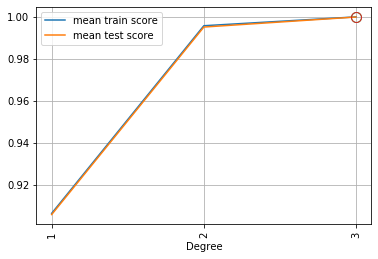

In [130]:

plt.plot(range(result_poly.shape[0]), result_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(result_poly.shape[0]), result_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_poly.shape[0]), result_poly['param_polynomialfeatures__degree'], rotation = 90)
plt.plot([grid_poly.best_index_], result_poly['mean_train_score'][grid_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_poly.best_index_], result_poly['mean_test_score'][grid_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.xlabel('Degree')
plt.legend()

POLYNOMIAL REGRESSION RESULTS

Grid search with Polynomial Regression gives us best parameter : degree =3

With an Average CV score of 0.99. 
 
Test score of 0.99

RIDGE REGRESSION

In [131]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [132]:
from  sklearn.linear_model import Ridge

ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid ,return_train_score=True, cv=5)
grid_search_ridge.fit(x_train, y_train)
print("Best parameters: {}".format(grid_search_ridge.best_params_))

print("Best cross-validation score: {:.4f}".format(grid_search_ridge.best_score_))

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.9059


In [133]:
ridge = Ridge(alpha = 0.01)
ridge.fit(x_train, y_train)
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.906397108083999
0.9071074317741513


In [134]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=4)
print("Cross-validation scores:\n{}".format(cross_val_score(ridge , x_train, y_train, cv=kfold)))
scores = cross_val_score(ridge , x_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.89937336 0.91173443 0.91111756 0.90034926]
0.9056436537966118


In [135]:
result_ridge = pd.DataFrame(grid_search_ridge.cv_results_)
result_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003594,0.003261,0.000200,0.000399,0.01,{'alpha': 0.01},0.900572,0.908812,0.910407,0.906662,...,0.905888,0.003640,1,0.907748,0.905742,0.905378,0.906266,0.907156,0.906458,0.000880
1,0.001796,0.000747,0.000399,0.000489,0.1,{'alpha': 0.1},0.900895,0.908756,0.910570,0.906335,...,0.905849,0.003620,2,0.907666,0.905668,0.905298,0.906200,0.907090,0.906384,0.000880
2,0.001396,0.000488,0.000598,0.000489,1,{'alpha': 1},0.900796,0.906820,0.909056,0.903328,...,0.903953,0.003527,3,0.905445,0.903638,0.903151,0.904362,0.905231,0.904365,0.000885
3,0.001198,0.000400,0.000798,0.000399,10,{'alpha': 10},0.892773,0.894691,0.894008,0.890212,...,0.891792,0.002727,4,0.892557,0.891443,0.890936,0.892467,0.893438,0.892168,0.000883
4,0.001197,0.000399,0.000798,0.000399,100,{'alpha': 100},0.735053,0.734308,0.725220,0.729668,...,0.731475,0.003632,5,0.729360,0.730343,0.733942,0.732974,0.734133,0.732150,0.001943


Text(0.5, 0, 'Alpha')

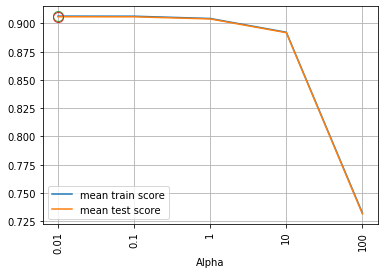

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(result_ridge.shape[0]), result_ridge['mean_train_score'], label = 'mean train score')
plt.plot(range(result_ridge.shape[0]), result_ridge['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_ridge.shape[0]), result_ridge['param_alpha'], rotation = 90)
plt.plot([grid_search_ridge.best_index_], result_ridge['mean_train_score'][grid_search_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_ridge.best_index_], result_ridge['mean_test_score'][grid_search_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

RIGDE REGRESSION RESUT:

Best parameter - alpha: 0.01, Average Cross validation score: 0.91

Test score: 0.92

LASSO REGRESSION

In [137]:
from sklearn.linear_model import Lasso


lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid,return_train_score=True, cv=5)
grid_search_lasso.fit(x_train, y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lasso.best_score_))

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.7994


In [138]:
lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.7998130938898612
0.8001114995755457


In [139]:
  
kfold = KFold(n_splits=4)
print("Cross-validation scores:\n{}".format(cross_val_score(lasso , x_train, y_train, cv=kfold)))
scores = cross_val_score(lasso , x_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.80078355 0.79783137 0.80178578 0.79770829]
0.7995272459518148


In [140]:
result_lasso = pd.DataFrame(grid_search_lasso.cv_results_)
result_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001995,1.168008e-07,0.000598,0.000488,0.01,{'alpha': 0.01},0.800980,7.994954e-01,0.80096,0.796543,...,0.799437,0.001620,1,0.79693,0.798028,0.800556,0.800892,0.802633,0.799808,0.002058
1,0.000998,2.611745e-07,0.001001,0.000007,0.1,{'alpha': 0.1},-0.000171,-3.941137e-07,-0.00002,-0.000096,...,-0.000058,0.000067,2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000997,4.370285e-07,0.000798,0.000399,1,{'alpha': 1},-0.000171,-3.941137e-07,-0.00002,-0.000096,...,-0.000058,0.000067,2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.001400,4.873088e-04,0.000794,0.000397,10,{'alpha': 10},-0.000171,-3.941137e-07,-0.00002,-0.000096,...,-0.000058,0.000067,2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.001597,4.897928e-04,0.000199,0.000399,100,{'alpha': 100},-0.000171,-3.941137e-07,-0.00002,-0.000096,...,-0.000058,0.000067,2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Text(0.5, 0, 'Alpha')

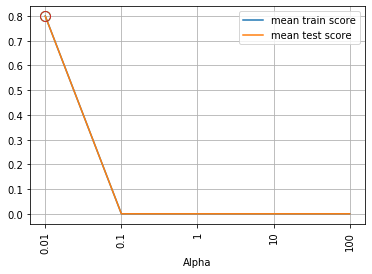

In [141]:
%matplotlib inline

plt.plot(range(result_lasso.shape[0]), result_lasso['mean_train_score'], label = 'mean train score')
plt.plot(range(result_lasso.shape[0]), result_lasso['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_lasso.shape[0]), result_lasso['param_alpha'], rotation = 90)
plt.plot([grid_search_lasso.best_index_], result_lasso['mean_train_score'][grid_search_lasso.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_lasso.best_index_], result_lasso['mean_test_score'][grid_search_lasso.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

LASSO REGRESSION RESUT:

Best parameter - alpha: 0.01, Average Cross validation score: 0.80
Test score: 0.80

LINEAR SVR

In [142]:
from sklearn.svm import SVR, LinearSVR

In [143]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon' : [0.01, 0.1, 1, 10, 100]}

linearsvr = LinearSVR()
grid_svrl = GridSearchCV(linearsvr, param_grid, return_train_score=True, cv=5)


grid_svrl.fit(x_train,y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [144]:
print("Best parameters: {}".format(grid_svrl.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svrl.best_score_))

Best parameters: {'C': 1, 'epsilon': 0.1}
Best cross-validation score: 0.9045


In [145]:
lsvr = LinearSVR(C = 1, epsilon = 0.1)
        
lsvr.fit(x_train, y_train)

print(lsvr.score(x_train, y_train))
print(lsvr.score(x_test, y_test))

0.9048964313892026
0.9056159115135405


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [146]:
  
kfold = KFold(n_splits=4)
print("Cross-validation scores:\n{}".format(cross_val_score(lsvr , x_train, y_train, cv=kfold)))
scores = cross_val_score(lsvr, x_train, y_train, cv=kfold)
print(np.mean(scores))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Cross-validation scores:
[0.89856834 0.91083598 0.90989913 0.89868132]
0.9044158872825487


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [147]:
result_linearsvr = pd.DataFrame(grid_svrl.cv_results_)
result_linearsvr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006833,0.001543,0.000399,4.883444e-04,0.01,0.01,"{'C': 0.01, 'epsilon': 0.01}",0.870070,0.871159,0.869053,...,0.868177,0.002508,8,0.868752,0.868092,0.867390,0.868077,0.870015,0.868465,0.000887
1,0.004787,0.000399,0.000598,4.884609e-04,0.01,0.1,"{'C': 0.01, 'epsilon': 0.1}",0.868132,0.869140,0.863948,...,0.865167,0.002954,9,0.865020,0.865294,0.864788,0.866274,0.866650,0.865605,0.000727
2,0.003590,0.000489,0.000599,4.891622e-04,0.01,1,"{'C': 0.01, 'epsilon': 1}",0.168634,0.189519,0.136623,...,0.171516,0.019048,15,0.163765,0.173710,0.162996,0.166513,0.190643,0.171525,0.010279
3,0.003193,0.001165,0.000599,4.894741e-04,0.01,10,"{'C': 0.01, 'epsilon': 10}",-6.559114,-6.725108,-7.008481,...,-6.836153,0.172594,16,-6.903464,-6.859338,-6.789215,-6.818859,-6.790762,-6.832328,0.043721
4,0.002593,0.000798,0.000798,3.987557e-04,0.01,100,"{'C': 0.01, 'epsilon': 100}",-6.559114,-6.725108,-7.008481,...,-6.836153,0.172594,16,-6.903464,-6.859338,-6.789215,-6.818859,-6.790762,-6.832328,0.043721
5,0.019242,0.000745,0.000398,4.870039e-04,0.1,0.01,"{'C': 0.1, 'epsilon': 0.01}",0.895700,0.899257,0.901502,...,0.896467,0.004017,6,0.897413,0.896331,0.895775,0.897474,0.896798,0.896758,0.000647
6,0.013268,0.002134,0.000796,3.979547e-04,0.1,0.1,"{'C': 0.1, 'epsilon': 0.1}",0.899620,0.904004,0.905583,...,0.901060,0.003479,3,0.902137,0.900683,0.900243,0.901421,0.902350,0.901367,0.000812
7,0.003192,0.000746,0.000199,3.989220e-04,0.1,1,"{'C': 0.1, 'epsilon': 1}",0.243493,0.253889,0.263112,...,0.247270,0.011387,14,0.236909,0.238449,0.283444,0.235817,0.236660,0.246256,0.018613
8,0.001992,0.000630,0.000598,4.886167e-04,0.1,10,"{'C': 0.1, 'epsilon': 10}",-6.559114,-6.725108,-7.008481,...,-6.836153,0.172594,16,-6.903464,-6.859338,-6.789215,-6.818859,-6.790762,-6.832328,0.043721
9,0.002194,0.000399,0.000399,4.884024e-04,0.1,100,"{'C': 0.1, 'epsilon': 100}",-6.559114,-6.725108,-7.008481,...,-6.836153,0.172594,16,-6.903464,-6.859338,-6.789215,-6.818859,-6.790762,-6.832328,0.043721


LINEAR SVR REGRESSION RESUT:

Best parameters: {'C': 1, 'epsilon': 0.1}, Average Cross validation score: 0.90

Test score: 0.91

SVR WITH LINEAR KERNEL

In [148]:
param_grid = {'C': [0.01,0.1, 1, 10, 100,1000]}

svr_linear = SVR(kernel='linear')
grid_svr_linear = GridSearchCV(svr_linear, param_grid, return_train_score=True, cv=5)

grid_svr_linear.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [149]:
print("Best parameters: {}".format(grid_svr_linear.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_linear.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.9046


In [150]:
svr = SVR(kernel = 'linear',C = 1)
        
svr.fit(x_train, y_train)
        
print(svr.score(x_train, y_train))
print(svr.score(x_test, y_test))

0.904978912398685
0.9056958592869953


In [151]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=4)
print("Cross-validation scores:\n{}".format(cross_val_score(svr , x_train, y_train, cv=kfold)))
scores = cross_val_score(svr , x_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.89858567 0.91084259 0.90991055 0.89831906]
0.9044144684231683


In [152]:
result_svr_linear = pd.DataFrame(grid_svr_linear.cv_results_)
result_svr_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.299247,0.008334,0.031950,0.001413,0.01,{'C': 0.01},0.868102,0.868687,0.863839,0.862910,...,0.865001,0.002880,6,0.865004,0.864819,0.864667,0.866104,0.866612,0.865441,0.000773
1,0.282479,0.045130,0.030228,0.006255,0.1,{'C': 0.1},0.899639,0.903946,0.905505,0.900330,...,0.900988,0.003504,5,0.902130,0.900587,0.900187,0.901402,0.902319,0.901325,0.000834
2,0.463031,0.026803,0.028628,0.002036,1,{'C': 1},0.899315,0.907610,0.909145,0.906140,...,0.904582,0.003879,1,0.906446,0.904356,0.903865,0.904627,0.905658,0.904990,0.000934
3,1.592214,0.043097,0.028380,0.001851,10,{'C': 10},0.897892,0.907522,0.908287,0.907068,...,0.904448,0.004072,2,0.906548,0.904427,0.903685,0.904525,0.905749,0.904987,0.001024
4,10.153806,0.631624,0.031533,0.002829,100,{'C': 100},0.897675,0.907458,0.908178,0.907094,...,0.904384,0.004109,4,0.906486,0.904348,0.903634,0.904469,0.905736,0.904935,0.001030
5,78.512036,2.372456,0.032154,0.001898,1000,{'C': 1000},0.897791,0.907426,0.908077,0.907155,...,0.904410,0.004044,3,0.906548,0.904357,0.903553,0.904539,0.905739,0.904947,0.001063


Text(0.5, 0, 'C')

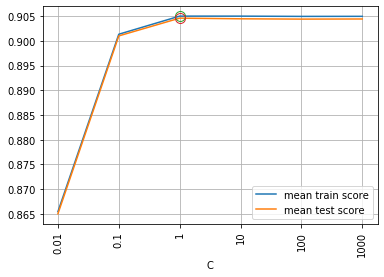

In [153]:
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_linear.shape[0]), result_svr_linear['param_C'], rotation = 90)
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_train_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_test_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

SVR WITH LINEAR KERNEL REGRESSION RESUT:

Best parameters: 'C':1, Average Cross validation score: 0.90
            
Test score: 0.91

SVR WITH RBF KERNEL

In [154]:
param_grid = {'C': [0.1, 1, 10, 100],'gamma':[0.1, 1, 10, 100]}

svr_rbf = SVR(kernel='rbf')
grid_svr_rbf = GridSearchCV(svr_rbf, param_grid, return_train_score=True, cv=5)

grid_svr_rbf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [155]:
print("Best parameters: {}".format(grid_svr_rbf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_rbf.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.9817


In [156]:
svr_rbf = SVR(kernel='rbf',C=100,gamma=0.1)
svr_rbf.fit(x_train, y_train)
print(svr_rbf.score(x_train, y_train))
print(svr_rbf.score(x_test, y_test))

0.98171561056686
0.9827219458891023


In [157]:

kfold = KFold(n_splits=4)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_rbf, x_train, y_train, cv=kfold)))
scores = cross_val_score(svr_rbf, x_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.98259217 0.98155419 0.98201181 0.98027074]
0.9816072267585804


In [158]:
result_rbf = pd.DataFrame(grid_svr_rbf.cv_results_)
result_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.361930,0.014659,0.049849,0.001743,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.917928,0.918785,0.917271,...,0.916629,0.001747,12,0.917195,0.916606,0.916704,0.916895,0.917813,0.917043,0.000434
1,0.136779,0.016836,0.013775,0.001035,0.1,1,"{'C': 0.1, 'gamma': 1}",0.970645,0.972433,0.970987,...,0.971161,0.000810,9,0.971661,0.972062,0.972300,0.971651,0.972001,0.971935,0.000249
2,0.206658,0.006236,0.024033,0.001017,0.1,10,"{'C': 0.1, 'gamma': 10}",0.955190,0.960558,0.962811,...,0.958322,0.002888,11,0.966963,0.966561,0.967455,0.967570,0.967632,0.967236,0.000412
3,1.038661,0.084568,0.105733,0.003984,0.1,100,"{'C': 0.1, 'gamma': 100}",0.481483,0.462960,0.487714,...,0.475963,0.012401,16,0.670695,0.672882,0.666125,0.675396,0.671864,0.671392,0.003056
4,0.237210,0.005843,0.026615,0.000421,1,0.1,"{'C': 1, 'gamma': 0.1}",0.962799,0.964054,0.964478,...,0.963462,0.000706,10,0.963776,0.963793,0.963728,0.963337,0.963787,0.963684,0.000175
5,0.109217,0.003796,0.005585,0.000486,1,1,"{'C': 1, 'gamma': 1}",0.979438,0.979830,0.979275,...,0.979357,0.000489,4,0.979476,0.979727,0.980687,0.979605,0.980105,0.979920,0.000437
6,0.195838,0.005636,0.019951,0.000613,1,10,"{'C': 1, 'gamma': 10}",0.970802,0.974782,0.972383,...,0.971655,0.001769,8,0.979650,0.980516,0.980263,0.980358,0.979918,0.980141,0.000314
7,1.406915,0.013304,0.106674,0.001943,1,100,"{'C': 1, 'gamma': 100}",0.688503,0.678546,0.702646,...,0.681750,0.014903,15,0.954201,0.954134,0.954468,0.954557,0.954747,0.954422,0.000227
8,0.148919,0.007815,0.008020,0.000697,10,0.1,"{'C': 10, 'gamma': 0.1}",0.977645,0.976780,0.975933,...,0.976422,0.000713,5,0.976870,0.976973,0.976526,0.976227,0.976659,0.976651,0.000263
9,0.105724,0.002082,0.004575,0.000496,10,1,"{'C': 10, 'gamma': 1}",0.980541,0.981996,0.979904,...,0.980823,0.000820,2,0.980580,0.981614,0.981814,0.981273,0.981896,0.981436,0.000479


SVR WITH RBF KERNEL RESULTS

Best parameters: 'C':100 & 'gamma' = 0.1 , Average Cross validation score: 0.98
            
Test score: 0.98

SVR WITH POLY KERNEL

In [159]:
param_grid = {'C': [0.1, 1, 10, 100],'degree':[1,2,3]}

svr_poly = SVR(kernel='poly')
grid_svr_poly = GridSearchCV(svr_poly, param_grid, return_train_score=True, cv=5)

grid_svr_poly.fit(x_train,y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [160]:
print("Best parameters: {}".format(grid_svr_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_poly.best_score_))
pd.DataFrame(grid_svr_poly.cv_results_)

Best parameters: {'C': 100, 'degree': 3}
Best cross-validation score: 0.9809


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.370386,0.004786,0.041120,0.001309,0.1,1,"{'C': 0.1, 'degree': 1}",0.848078,0.846779,0.840874,...,0.843586,0.003166,9,0.844162,0.842648,0.843755,0.844531,0.845675,0.844154,0.000988
1,0.538000,0.014271,0.064178,0.002295,0.1,2,"{'C': 0.1, 'degree': 2}",0.608983,0.613277,0.596098,...,0.607370,0.005902,11,0.604680,0.605288,0.612551,0.608685,0.610382,0.608317,0.002991
2,0.613454,0.017497,0.073007,0.005897,0.1,3,"{'C': 0.1, 'degree': 3}",0.263759,0.269781,0.255934,...,0.265673,0.005722,12,0.265020,0.265315,0.271377,0.263302,0.266669,0.266337,0.002738
3,0.304520,0.008139,0.034714,0.001472,1,1,"{'C': 1, 'degree': 1}",0.898961,0.902730,0.904079,...,0.899849,0.003335,8,0.900783,0.899400,0.898995,0.900248,0.901349,0.900155,0.000865
4,0.272903,0.009415,0.030319,0.001017,1,2,"{'C': 1, 'degree': 2}",0.927409,0.927780,0.922114,...,0.924111,0.002862,5,0.924693,0.923970,0.924586,0.924920,0.924116,0.924457,0.000358
5,0.562861,0.029985,0.065993,0.002985,1,3,"{'C': 1, 'degree': 3}",0.687882,0.691782,0.673396,...,0.684309,0.006428,10,0.682505,0.682476,0.689692,0.686552,0.685740,0.685393,0.002713
6,0.536177,0.009869,0.040188,0.000851,10,1,"{'C': 10, 'degree': 1}",0.899617,0.907520,0.909209,...,0.904520,0.003825,6,0.906357,0.904257,0.903836,0.904606,0.905657,0.904943,0.000929
7,0.124212,0.005729,0.008828,0.000394,10,2,"{'C': 10, 'degree': 2}",0.975307,0.975808,0.975452,...,0.975338,0.000363,3,0.975472,0.975577,0.975462,0.975470,0.975518,0.975500,0.000043
8,0.256209,0.002434,0.027600,0.000796,10,3,"{'C': 10, 'degree': 3}",0.943827,0.945577,0.941256,...,0.942792,0.001663,4,0.943057,0.942957,0.942884,0.943527,0.943611,0.943207,0.000302
9,1.540324,0.041701,0.042034,0.002852,100,1,"{'C': 100, 'degree': 1}",0.897969,0.907552,0.908366,...,0.904479,0.004070,7,0.906563,0.904466,0.903754,0.904531,0.905767,0.905016,0.001009


In [161]:
svr_p = SVR(kernel='poly',C=100,degree = 3)
svr_p.fit(x_train, y_train)
print(svr_p.score(x_train, y_train))
print(svr_p.score(x_test, y_test))

0.981698959053218
0.9819505852728687


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [162]:

kfold = KFold(n_splits=4)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_p, x_train, y_train, cv=kfold)))
scores = cross_val_score(svr_p, x_train, y_train, cv=kfold)
print(np.mean(scores))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Cross-validation scores:
[0.98092624 0.98035884 0.98107625 0.979491  ]


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9804630811355703


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [163]:
result_svr_poly= pd.DataFrame(grid_svr_poly.cv_results_)
result_svr_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.370386,0.004786,0.041120,0.001309,0.1,1,"{'C': 0.1, 'degree': 1}",0.848078,0.846779,0.840874,...,0.843586,0.003166,9,0.844162,0.842648,0.843755,0.844531,0.845675,0.844154,0.000988
1,0.538000,0.014271,0.064178,0.002295,0.1,2,"{'C': 0.1, 'degree': 2}",0.608983,0.613277,0.596098,...,0.607370,0.005902,11,0.604680,0.605288,0.612551,0.608685,0.610382,0.608317,0.002991
2,0.613454,0.017497,0.073007,0.005897,0.1,3,"{'C': 0.1, 'degree': 3}",0.263759,0.269781,0.255934,...,0.265673,0.005722,12,0.265020,0.265315,0.271377,0.263302,0.266669,0.266337,0.002738
3,0.304520,0.008139,0.034714,0.001472,1,1,"{'C': 1, 'degree': 1}",0.898961,0.902730,0.904079,...,0.899849,0.003335,8,0.900783,0.899400,0.898995,0.900248,0.901349,0.900155,0.000865
4,0.272903,0.009415,0.030319,0.001017,1,2,"{'C': 1, 'degree': 2}",0.927409,0.927780,0.922114,...,0.924111,0.002862,5,0.924693,0.923970,0.924586,0.924920,0.924116,0.924457,0.000358
5,0.562861,0.029985,0.065993,0.002985,1,3,"{'C': 1, 'degree': 3}",0.687882,0.691782,0.673396,...,0.684309,0.006428,10,0.682505,0.682476,0.689692,0.686552,0.685740,0.685393,0.002713
6,0.536177,0.009869,0.040188,0.000851,10,1,"{'C': 10, 'degree': 1}",0.899617,0.907520,0.909209,...,0.904520,0.003825,6,0.906357,0.904257,0.903836,0.904606,0.905657,0.904943,0.000929
7,0.124212,0.005729,0.008828,0.000394,10,2,"{'C': 10, 'degree': 2}",0.975307,0.975808,0.975452,...,0.975338,0.000363,3,0.975472,0.975577,0.975462,0.975470,0.975518,0.975500,0.000043
8,0.256209,0.002434,0.027600,0.000796,10,3,"{'C': 10, 'degree': 3}",0.943827,0.945577,0.941256,...,0.942792,0.001663,4,0.943057,0.942957,0.942884,0.943527,0.943611,0.943207,0.000302
9,1.540324,0.041701,0.042034,0.002852,100,1,"{'C': 100, 'degree': 1}",0.897969,0.907552,0.908366,...,0.904479,0.004070,7,0.906563,0.904466,0.903754,0.904531,0.905767,0.905016,0.001009


SVR WITH POLY KERNEL RESULTS

Best parameters: 'C':100 & 'degree' = 3 , Average Cross validation score: 0.98
            
Test score: 0.98

# Inference



Based on cross validation score and the test score for above models, 

it is inferred that the "Polynominal Regression" is the best model to predict the house prices.

Grid search with Polynomial Regression gives us best parameter : degree =3

With an Average CV score of 0.99. 
 
Test score of 0.99

# Predicting using POLYNOMIAL REGRESSION

In [166]:
poly_predict = pol_reg.predict(x_test_pol)


In [167]:
poly_predict

array([1.07214201, 1.00546125, 1.49606131, ..., 1.3599874 , 0.26597074,
       0.45865491])